# FINAL PROJECT

$\textbf{Project 1: Interpolation with Autoregressive Model}$


During the solution of this problem, it is assumed that the model can be represented with the following equation;

$\begin{equation}
X_t=A_4X_{t-4}+A_3X_{t-3}+A_2X_{t-2}+A_1X_{t-1}+\epsilon_t
\end{equation}$

Hence, the first linear least square problem can be represented as,

$\begin{equation}
\begin{bmatrix}
X_t \\ X_{t+1} \\ X_{t+2} \\ \vdots \\ X_M
\end{bmatrix} =
\begin{bmatrix}
X_{t-1} & X_{t-2} & X_{t-3} & X_{t-4} \\ X_{t} & X_{t-1} & X_{t-2} & X_{t-3} \\ X_{t+1} & X_{t+2} & X_{t+3} & X_{t+4} \\ \vdots & \vdots & \vdots &\vdots \\ X_{M-1} & X_{M-2} & X_{M-3} & X_{M-4}
\end{bmatrix}
\begin{bmatrix}
A_1 \\ A_2 \\ A_3 \\ A_4
\end{bmatrix}+ \begin{bmatrix}
\epsilon_t \\ \epsilon_{t+1} \\ \epsilon_{t+2} \\ .. \\ \epsilon_M
\end{bmatrix}
\end{equation}$

Reading the data, and initializing the missing data with zeros, A matrix can be found by using least square solution. 


Solution is $A=(G_x^TG_x)^{-1}G_x^TX$.

Then in order to find missing $X$ values, second linear least squares problem is represented as,

$\begin{equation}
\begin{bmatrix}
\epsilon_t \\ \epsilon_{t+1} \\ \epsilon_{t+2} \\ \vdots \\ \epsilon_M
\end{bmatrix}=\begin{bmatrix}
-A^T & 1 & 0 &0 & ...& 0  \\ 0 & -A^T & 1 & 0& ...&  0\\ \vdots & \ddots &  \ddots & \ddots & \ddots& \vdots \\ 0 & ... & 0 &-A^T &1& 0  \\0 & ...&0 &0 &-A^T& 1 
\end{bmatrix}
\begin{bmatrix}
X_1 \\ X_2 \\ X_{3} \\ \vdots \\ X_M
\end{bmatrix}
\end{equation}$

where $X=X_{ob}+X_{mi}$. Solution can be shown as $X_{mi}=-(G_A^TG_A)^{-1}G_A^TX_{ob}$ where the solution is obtained by using SVD method. 

 $\textbf{Note:}$ the difference in the A values is due to the difference in the formulation.

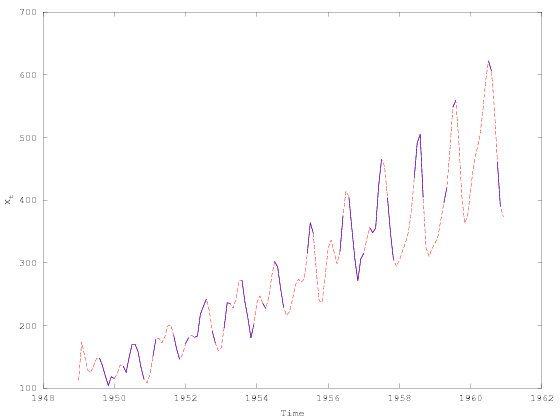

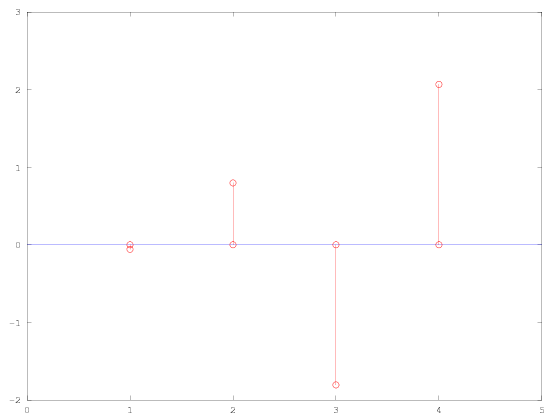

In [215]:
clear all
% Read the data
m=csvread('flights.csv',1,0);
% Make missing data equal to NaN
m(m==0)=NaN;
% Keep Time and Flight vectors seperately
T=m(:,1);
X=m(:,2);
% Keep the raw data
X_raw=X;
% Plot the data
plot(T,X,'LineWidth',2); hold on;

% Initialize vectors to be used
data_length=length(X);
X_ob=zeros(data_length,1);
X_mi=zeros(data_length,1);
deficient=zeros(data_length,1);
% Determine the location of missing data, keep the total number of missing data
for i=1:data_length
    if isnan(X(i))==1
        X_mi(i)=X(i);
        deficient(i)=1;
    else
        X_ob(i)=X(i);
    end
end

% Determine the parameter length
par_length=4;

% Initialize matrices to be used
G_x=zeros(data_length-par_length,par_length);
G_A=zeros(data_length-par_length,data_length);
G_A_modified=zeros(data_length-par_length,data_length);

% Make missing data equal to zero for the first iteration
X(isnan(X)==1)=0;

% Iterate for 100 times
for iter=1:100
    for i=1:data_length-par_length
        G_x(i,:)=X(i:i+par_length-1);
    end
    
    % Solve the first LS problem
    w=G_x'*G_x;
    A=w\(G_x'*X(par_length+1:end));
    
    % Construct G_A matrix
    for i=1:data_length-par_length
        G_A(i,:)=[zeros(1,i-1) -A' 1 zeros(1,data_length-par_length-i) ];
    end
    
    % Neglect columns correspond to the observed data
    % Construct modified G_A matrix for the solution of second LS problem
    b=-G_A*X_ob;
    z=size(G_A,2);
    iter=1;
    G_A_modified=G_A;
    for i=1:z
        if isnan(X_raw(i))==0
            G_A_modified(:,i)=zeros(data_length-par_length,1);
            iter=iter+1;
        end
    end
    G_A_modified(:,~any(G_A_modified,1))=[];
    
    % Use SVD method for the solution
    [U,D,V]=svd(G_A_modified,0);
    l=U'*b;
    S=D\l;
    X_mi_vals=V*S;
    count=1;
    
    % Put missing values into corresponding places
    for i=1:data_length
        if deficient(i)==1
            X_mi(i)=X_mi_vals(count);
            count=count+1;
        end
    end
    X=X_mi+X_ob;
end

% Plot the results
plot(T,X,'r--')
xlabel('Time')
ylabel('X_t')
figure
plot([0,5],[0,0],'b'); hold on
for i=1:4
plot([i,i],[0, A(i)],'r-o'); hold on
end

$\textbf{Bonus part:}$



$\begin{equation}
\epsilon_t=A_4X_{t-4}+A_3X_{t-3}+A_2X_{t-2}+A_1X_{t-1}+A_0X_t+Ct+D
\end{equation}$

$\implies$  $\begin{equation}
X_t=-(A_4 X_{t-4}+A_3 X_{t-3}+A_2 X_{t-2}+A_1 X_{t-1}+Ct+D)+\epsilon_t
\end{equation}$,  with different A,C,D values. Then,


$\begin{equation}
\begin{bmatrix}
X_t \\ X_{t+1} \\ X_{t+2} \\ \vdots \\ X_M
\end{bmatrix} =
-\begin{bmatrix}
X_{t-1} & X_{t-2} & X_{t-3} & X_{t-4} & t & 1  \\ X_{t} & X_{t-1} & X_{t-2} & X_{t-3} & t+1 & 1 \\ X_{t+1} & X_{t+2} & X_{t+3} & X_{t+4} & t+2 & 1 \\ \vdots & \vdots & \vdots &\vdots & \vdots & \vdots \\ X_{M-1} & X_{M-2} & X_{M-3} & X_{M-4} & M & 1
\end{bmatrix}
\begin{bmatrix}
A_1 \\ A_2 \\ A_3 \\ A_4 \\ C \\ D
\end{bmatrix}+ \begin{bmatrix}
\epsilon_t \\ \epsilon_{t+1} \\ \epsilon_{t+2} \\ .. \\ \epsilon_M
\end{bmatrix}
\end{equation}$


Solution is $A=-(G_x^TG_x)^{-1}G_x^TX$ where $A=[A_1 \ A_2\  A_3\ A_4\ C\ D]^T$. Second LS is formulated as,


$\begin{equation}
\begin{bmatrix}
\epsilon_t \\ \epsilon_{t+1} \\ \epsilon_{t+2} \\ \vdots \\ \epsilon_M
\end{bmatrix}=\begin{bmatrix}
A^T & 1 & 0 &0 & ...& 0  \\ 0 & A^T & 1 & 0& ...&  0\\ \vdots & \ddots &  \ddots & \ddots & \ddots& \vdots \\ 0 & ... & 0 &A^T &1& 0  \\0 & ...&0 &0 &A^T& 1 
\end{bmatrix}
\begin{bmatrix}
X_1 \\ X_2 \\ X_{3} \\ \vdots \\ X_M
\end{bmatrix}+C\begin{bmatrix}
t \\ t+1 \\ t+2 \\ \vdots \\ M
\end{bmatrix}+D\begin{bmatrix}
1 \\ 1 \\ 1 \\ \vdots \\ 1
\end{bmatrix}
\end{equation}$


and the solution is $X_{mi}=-(G_A^TG_A)^{-1}G_A^T(X_{ob}+Ct+D)$.


$\textbf{Note:}$ No improvement is observed for the first part of the data. However, in the last part a better fit is obtained.


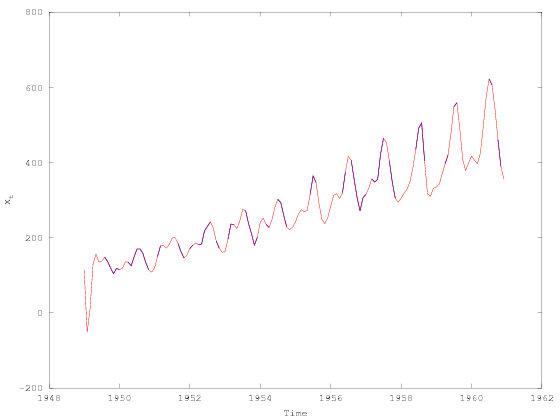

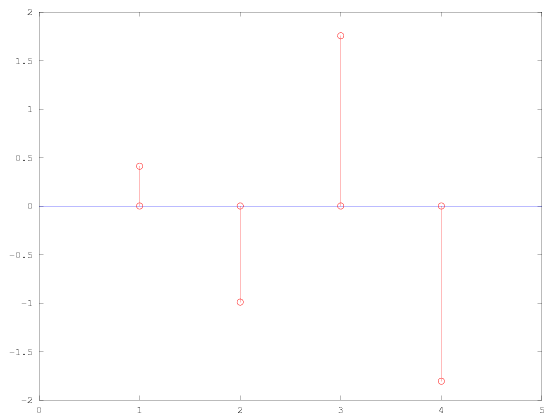

In [217]:
% It is the same code with the above code cell with slight differences for the solution. 

clear all
m=csvread('flights.csv',1,0);
m(m==0)=NaN;
T=m(:,1);
X=m(:,2);
X_raw=X;
plot(T,X,'LineWidth',2); hold on;
data_length=length(X);
X_ob=zeros(data_length,1);
X_mi=zeros(data_length,1);
deficient=zeros(data_length,1);
for i=1:data_length
    if isnan(X(i))==1
        X_mi(i)=X(i);
        deficient(i)=1;
    else
        X_ob(i)=X(i);
    end
end
par_length=4;
t=par_length+1:1:data_length;
C_vector=t';
D_vector=ones(data_length-par_length,1);
A=zeros(par_length+2,1);
G_x=zeros(data_length-par_length,par_length+2);
G_A=zeros(data_length-par_length,data_length);
G_A_modified=zeros(data_length-par_length,data_length);
X(isnan(X)==1)=0;
for iter=1:20

    % Here we define the new G_X with minus sign!
    for i=1:data_length-par_length
        G_x(i,1:par_length)=-X(i:i+par_length-1);
    end
    % Add C and D vectors !
    G_x(:,par_length+1)=-C_vector;
    G_x(:,end)=-D_vector;
    
    % Use SVD method for the solution due to singularity problems during calculations
    w=G_x'*G_x;
    [U_1,D_1,V_1]=svd(w,0);
    b_1=G_x'*X(par_length+1:end);
    l_1=U_1'*b_1;
    S_1=D_1\l_1;
    A=V_1*S_1;
    
    % Detine G_A without minus sign for A vector!
    for i=1:data_length-par_length
        G_A(i,:)=[zeros(1,i-1) A(1:par_length)' 1 zeros(1,data_length-par_length-i) ];
    end
    b=-G_A*X_ob-C_vector*A(end-1)-D_vector*A(end);
    z=size(G_A,2);
    iter=1;
    G_A_modified=G_A;
    for i=1:z
        if isnan(X_raw(i))==0
            G_A_modified(:,i)=zeros(data_length-par_length,1);
            iter=iter+1;
        end
    end
    
    % Use SVD method for the solution
    G_A_modified(:,~any(G_A_modified,1))=[];
    [U,D,V]=svd(G_A_modified,0);
    l=U'*b;
    S=D\l;
    X_mi_vals=V*S;
    count=1;
    for i=1:data_length
        if deficient(i)==1
            X_mi(i)=X_mi_vals(count);
            count=count+1;
        end
    end
    X=X_mi+X_ob;
end
plot(T,X,'r-')
xlabel('Time')
ylabel('X_t')
figure
plot([0,5],[0,0],'b'); hold on
for i=1:4
plot([i,i],[0, A(i)],'r-o'); hold on
end


$\textbf{Project 2: Image Segmentation with Spectral Clustering}$


During the solution, exactly the same formulation and procedure,explained in problem definition , is followed. Hence details are provided within the code. 

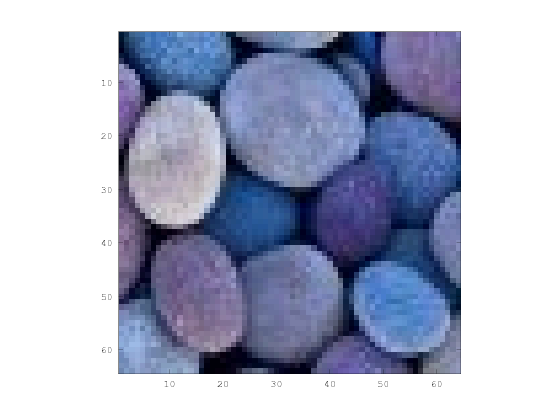

In [221]:
%Similarity function
function sim=sim(c_i,c_j)
    Lambda=[0.299 0.587 0.114; -0.14713 -0.28886 0.436; 0.615 -0.51499 -0.10001];
    sigma=10.0;
    len=length(c_i);
    total=0;
    for i=1:len
        total=total+(Lambda(i,:)*(c_i-c_j))^2;
    end
    total=-total/(2*sigma^2);
    sim=exp(total);
end

%Read and show the image
I=imread('stones_rgb.jpg');
imshow(I);
axis on;

%Determine the size of the image, initialize p_i and c_i vectors 
h=size(I,1);
n=h*h;
p_i=zeros(n,1);
c_i=zeros(n,3);
count=1;

% Write the values into position and color vectors
for y=1:h
    for x=1:h
        p_i(count)=x+h*(y-1);
        c_i(count,:)=I(y,x,:);
        count=count+1;
    end
end


% Calculate similarity matrix
%NOTE: It takes time!
W=zeros(n,n);
r=2;
x=zeros(2,1);
y=zeros(2,1);

for i=1:n
    y(1)=idivide(p_i(i),h+1/h);
    x(1)=p_i(i)-h*y(1);
    % Inside loop only looks above and below three lines
    % considering that none of the remaining pixels are similar
    for j=i:h*(y(1)+r+1)
        if j>=n
            j=n;
        end
        y(2)=idivide(p_i(j),h+1/h);
        x(2)=p_i(j)-h*y(2);
            if i!=j && abs(x(1)-x(2))<=r && abs(y(1)-y(2))<=r
                W(i,j)=sim(c_i(i,:)',c_i(j,:)');
                W(j,i)=W(i,j);
            end
    end
end

In [222]:
% Norm 2 function is used as stopping criteria for eigenvalue iterations
function result=normtwo(v)
    len=length(v);
    total=0;
    for i=1:len
        total=total+v(i)^2;
    end
    result=sqrt(total);
end


% Calculate the square root of the inverse of the degree matrix 
% D^(-1/2)
D=zeros(n,n);
tot=zeros(n,1);
for i=1:n
    D(i,i)=1/sqrt(sum(W(i,:)));
end

% Calculate Laplacian
L=D*W*D;

% QR iteration for finding first 5 eigenvectors
% Initialize orthonormal vectors by using a random matrix. 
A=rand(n,5);
[Q,R]=qr(A,0);

% As stopping criteria, use the norm difference of rayleigh quotients 
Ray=diag(Q'*L*Q);
Ray_last=rand(5,1);
Diff=normtwo(Ray-Ray_last);
% Keep iterating while the norm difference is greater than a bound. 
while Diff>10^-5
    Ray_last=Ray;
    z=L*Q;
    [Q,R]=qr(z,0);
    Ray=diag(Q'*z);
    Diff=normtwo(Ray-Ray_last);
end

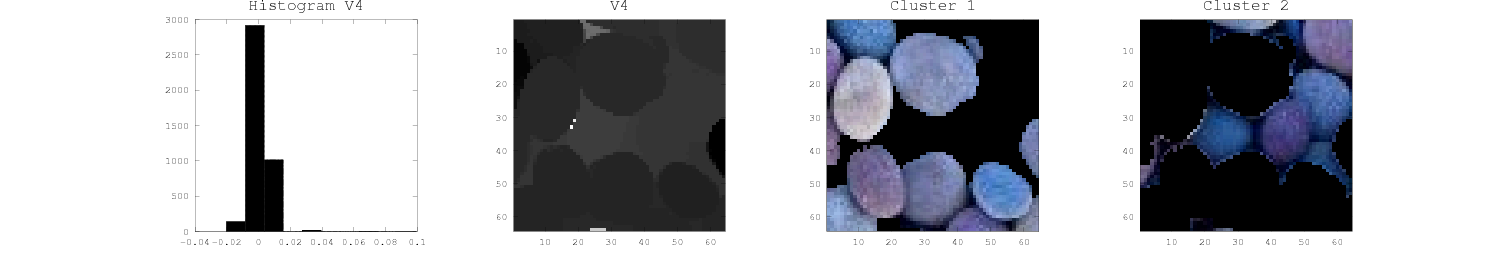

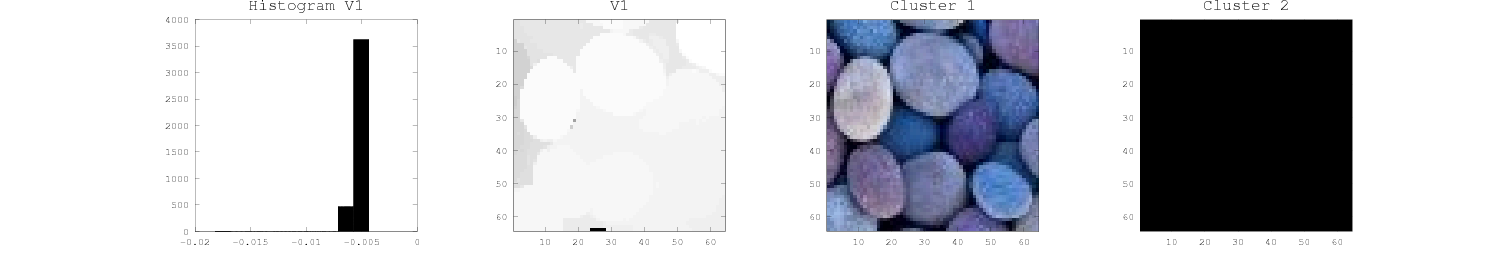

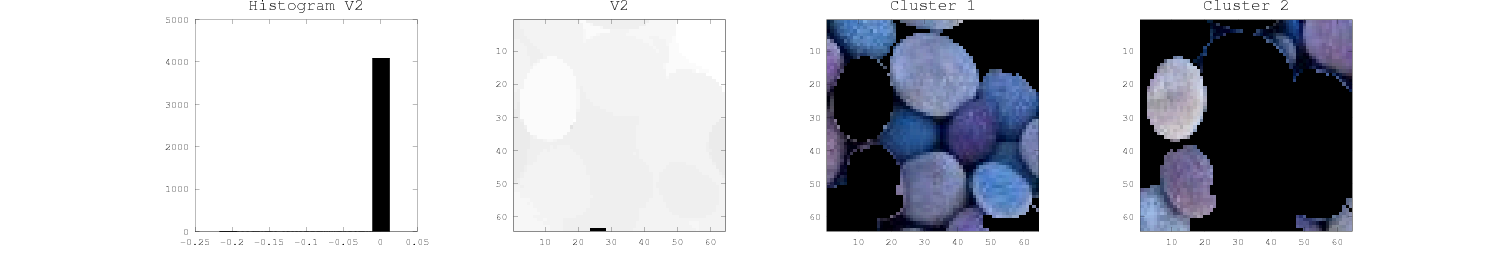

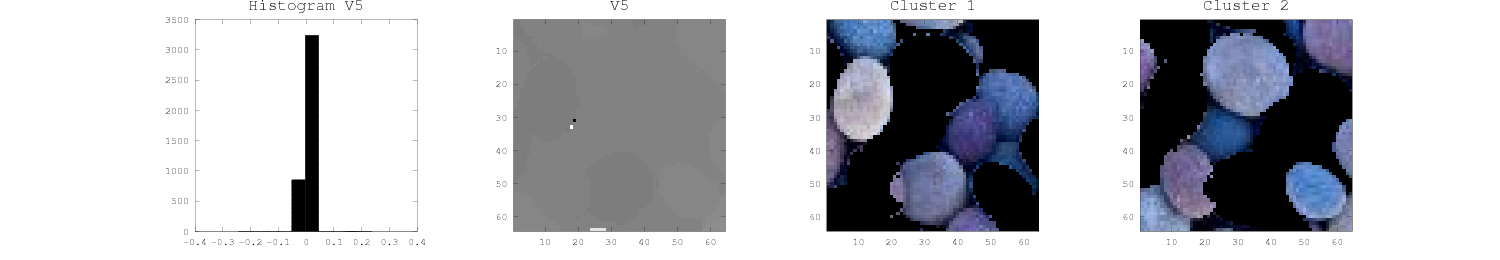

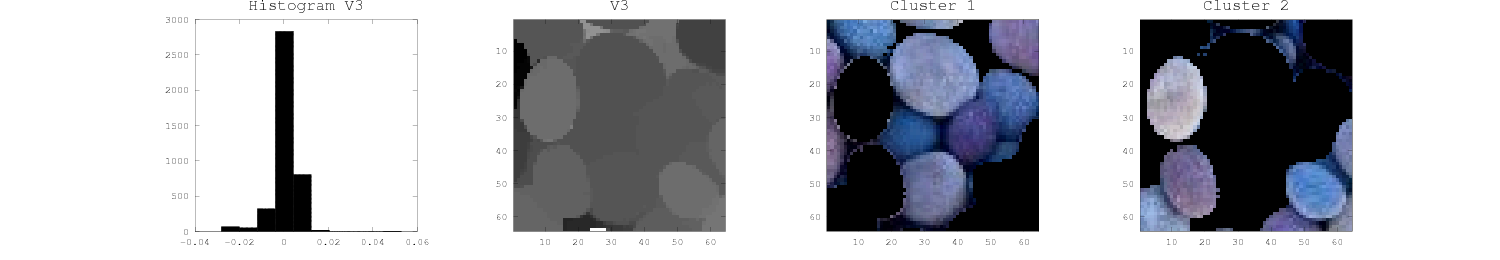

In [223]:
%Calculate V vector. Remember that D is actually D^(-1/2).
V=D*Q;
% Plot results
for k=1:5
    V_image=zeros(h,h);
    cl_1=zeros(h,h,3);
    cl_2=zeros(h,h,3);
    figure('Position', [0,0, 1500, 260]);
   subplot(1,4,1)
    hist(V(:,k));
    title(['Histogram V' num2str(k)],'FontSize',16);
    
    % Reshape V matrix
    for i=1:h
        V_image(i,:)=V(h*(i-1)+1:h*i,k);
    end  
    
    % Construct Cluster matrices
    for i=1:h
        for j=1:h
            if V_image(i,j)<0
                cl_1(i,j,:)=1;
            else
                cl_2(i,j,:)=1;
            end
        end
    end
    
    % Normalize V matrix
    V_image_norm=V_image-min(V_image(:));
    V_image_normed=V_image_norm./max(V_image_norm(:));
    subplot(1,4,2)
    imshow(V_image_normed);
    axis on;
    title(['V' num2str(k)],'FontSize',16);
    
    % Cluster matrices. Only non-zero values will be visible in images
    for m=1:3
        cl_1(:,:,m)=cl_1(:,:,m).*I(:,:,m);
        cl_2(:,:,m)=cl_2(:,:,m).*I(:,:,m);
    end
    subplot(1,4,3)
    cl_1=uint8(cl_1);
    imshow(cl_1);
    axis on;
    title('Cluster 1','FontSize',16);
    subplot(1,4,4)
    cl_2=uint8(cl_2);
    imshow(cl_2);
    axis on;
    title('Cluster 2','FontSize',16);
end